In [1]:
# preliminary installation 
# gensim is a Natural Language Processing (NLP) library

!pip install gensim

In [2]:
# Imports for libraries and modules 
# MAKE SURE TO RUN THIS FOR THE CODE TO WORK

import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline

In [19]:
# Read csv of pre-matched Tweets to Tags

df = pd.read_csv('tweets.csv')
df = df[pd.notnull(df['Tags'])]
df.head(10)

,Tweets,Tags
0,An inspiration in all aspects: Fashion,Delicious
1,go team,Delicious
2,literally beautiful just the way you are,Delicious
3,YASSSSS,Delicious
4,Beautiful album from the greatest unsung guit...,Delicious
5,Good luck to Rich riding for great project in ...,Delicious
6,Omg he... kissed... him crying with joy,Delicious
7,happy anniv ming and papi!!!!! love love happy,Delicious
8,music feeds my soul,Delicious
9,"dancing in my room , feeling happy",Delicious


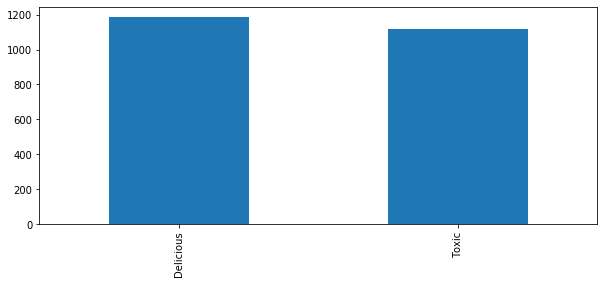

In [20]:
# Create a bar chart to analyze tags and see which tags are used the most
# my_tags is the list of tags we'll want to use to for the NLP model (further down)

my_tags = ['Delicious','Toxic']
plt.figure(figsize=(10,4))
df.Tags.value_counts().plot(kind='bar');

In [21]:
# Create a function that match tweet and tag

def print_plot(index):
    example = df[df.index == index][['Tweets', 'Tags']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])

In [22]:
# Print plot at the 10th index

print_plot(10)

 Join  vote for the singer! Do spread the word. :D
Tag: Delicious


In [23]:
# make sure to use the stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\607223\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
#Clean up Text just in case there are anomalies in text

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwords from text
    return text

In [25]:
# Use our clean_text function to clean up the text in the 'Tweets' column in our dataframe (df)

df['Tweets'] = df['Tweets'].apply(clean_text)

In [26]:
print_plot(10)

join vote singer spread word
Tag: Delicious


In [28]:
# How many words are we working with?

df['Tweets'].apply(lambda x: len(x.split(' '))).sum()

13561

In [29]:
# The next steps includes feature engineering. 
# Convert Titles to a matrix of token counts (CountVectorizer), then transform a count matrix to a normalized tf-idf representation (tf-idf transformer). 
# Then we'll train several classifiers

X = df.Tweets
y = df.Tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [38]:
# See accuracy of Linear support vector machine

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

In [39]:
# sgd = stochastic gradient descent

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [40]:
# let's see what the algorithm generates

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.91027496382055
              precision    recall  f1-score   support

   Delicious       0.88      0.96      0.92       362
       Toxic       0.95      0.85      0.90       329

    accuracy                           0.91       691
   macro avg       0.92      0.91      0.91       691
weighted avg       0.91      0.91      0.91       691



In [42]:
#Upload new data to feed the model for predictions

df_newdata = pd.read_csv('new_tweets.csv')
df_newdata.head(10)

,Tweets
0,Pak PM survives removal scare
1,but court orders further probe into corruptio...
2,Supreme Court quashes criminal complaint again...
3,Art of Living's fights back over Yamuna floodp...
4,livid.
5,FCRA slap on NGO for lobbying...But was it doi...
6,Why doctors
7,pharma companies are opposing names on
8,Why a bicycle and not a CM asked. His officer ...
9,It's 2017. making law to ban And MHA is sittin...


In [43]:
#Remember the clean_text function? we're calling her again

df_newdata['Tweets'] = df_newdata['Tweets'].apply(clean_text)

In [44]:
# How does our cleaned data look?

df_newdata.head(10)

,Tweets
0,pak pm survives removal scare
1,court orders probe corruption charge
2,supreme court quashes criminal complaint crick...
3,art livings fights back yamuna floodplain damage
4,livid
5,fcra slap ngo lobbyingbut part govt campaign
6,doctors
7,pharma companies opposing names
8,bicycle cm asked officer learnt ground reality...
9,2017 making law ban mha sitting draft


In [45]:
# How many words are we working with with our new data set?

df_newdata['Tweets'].apply(lambda x: len(x.split(' '))).sum()

7334

In [46]:
# Assign our 'Tweets' to a variable

X_newdata = df_newdata.Tweets

In [47]:
# Use our sgd model to make predictions for our new input

y_newdata = sgd.predict(X_newdata)
print(X_newdata, y_newdata)

0                           pak pm survives removal scare
1                    court orders probe corruption charge
2       supreme court quashes criminal complaint crick...
3        art livings fights back yamuna floodplain damage
4                                                   livid
5            fcra slap ngo lobbyingbut part govt campaign
6                                                 doctors
7                         pharma companies opposing names
8       bicycle cm asked officer learnt ground reality...
9                   2017 making law ban mha sitting draft
10          rivals govts unite act sexdetermination tests
11      haryana peasants demand justice right cattle t...
12      schools calcutta elsewhere stunned imposition ...
13                                         renamed places
14                                             oooh shame
15                             trauma driving without red
16                          flashing light paying parking
17            

In [48]:
# Format the new predictions with a dataframe that will have new data and their predicted new tags
# Using DataFrame.insert() to add a 'New Tags' column 
  
df_newdata.insert(1, 'New Tags', y_newdata, False)
df_newdata.head(20)

,Tweets,New Tags
0,pak pm survives removal scare,Delicious
1,court orders probe corruption charge,Delicious
2,supreme court quashes criminal complaint crick...,Delicious
3,art livings fights back yamuna floodplain damage,Delicious
4,livid,Delicious
5,fcra slap ngo lobbyingbut part govt campaign,Toxic
6,doctors,Delicious
7,pharma companies opposing names,Delicious
8,bicycle cm asked officer learnt ground reality...,Delicious
9,2017 making law ban mha sitting draft,Delicious


In [49]:
#save the dataframe to csv
df_newdata.to_csv('NLP_Classified_Tweets.csv', index=True)